# Synopsis

This code generates the g2 (ROI2) and tau vs. Q figure (droplet) for the manuscript

## Initialize

In [104]:

import numpy as np
from numpy import sqrt, sin, cos, pi, exp
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import h5py  
from scipy.optimize import curve_fit
import scipy.integrate as integrate
from xpcs_viewer import XpcsFile as xf
import csv

## Read data

In [105]:

# fn_path = '../Reduced_Data/'

# Water = xf('J058_Water_XPCS_Trim.hdf', cwd = fn_path)
# NaCl = xf('L067_NaCl_XPCS_Trim.hdf', cwd = fn_path)
# NH4 = xf('M071_NH4_XPCS_Trim.hdf', cwd = fn_path)

fn_path = "/Users/dozgulbas/APS_Data/"
noisy_droplet = "E0098_D100_Pendant_022C_att01_Rq0_00001_0001-100000.hdf"
dropleta = "AvgF084_Pendant_WithCase_Cen_att00_Lq0_Rq0_00001_0001-100000.hdf"
CapCellb = "AvgD129_D100_samy3_Cell_att00_Lq0_Rq0_00001_0001-100000.hdf"
capillaryc = "AvgF091_D100_Capillary_Post_att00_Lq0_Rq0_00001_0001-100000.hdf"
 
droplet = xf(dropleta, cwd = fn_path)
CapCell = xf(CapCellb, cwd = fn_path)
capillary = xf(capillaryc, cwd = fn_path)


In [106]:
x = []
y = []
z = []
with open("burst_plot_1.csv", "r") as File:  
    plots = csv.reader(File,  delimiter = ',') 
    count = 0
    for row in plots:
        
        if count > 9:
            break
        x.append(float(row[0]))
        y.append(float(row[2]))
        z.append(float(row[1]))
        count+=1
  
# plt.bar(x, y, color = 'g', width = 0.72, label = "Age")
# plt.xlabel('Names')
# plt.ylabel('Ages')
# plt.title('Ages of different persons')
# plt.legend()
# plt.show()

# plt.plot(x, z, color = 'g', linestyle = 'dashed',
#          marker = 'o',label = "Weather Data")
# plt.gca().invert_yaxis() 
# plt.xticks(rotation = 25)
# plt.xlabel('Dates')
# plt.ylabel('Temperature(°C)')
# plt.title('Weather Report', fontsize = 20)
# plt.grid()
# plt.legend()
# plt.show()

## Fit g2 for droplet data

0.18 0.00028681747667689926 1.0 1.0017215843781078
[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.001 0.001
 0.001 0.001 0.001 0.002 0.002 0.002 0.003 0.003 0.004 0.005 0.006 0.007
 0.008 0.01 ]


/var/folders/_f/s9dqqnv91k1gyc13pnzyggvh0000gr/T/ipykernel_2472/835895174.py:137: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['10$^\mathdefault{}$',


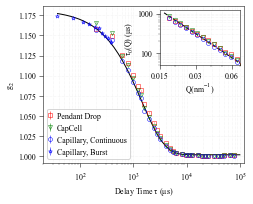

In [281]:

contrast = 0.185
# contrast_drop = 0.18
contrast_cell = 0.17
contrast_cap = 0.18
contrast_noisy_drop = 0.172
exp_arg = 1

LB_list_g2 = [contrast, 1e-6, exp_arg, 0.95]
UB_list_g2 = [contrast, 1, exp_arg, 1.05]

a= droplet.fit_g2(q_range=[1, 1.75],t_range=[1e-7, 8e-2], bounds=[LB_list_g2, UB_list_g2],
    fit_flag=[False, True, False, True])
b = CapCell.fit_g2(q_range=[1, 1.75],t_range=[1e-7, 8e-2], bounds=[[contrast_cell, 1e-6, exp_arg, 0.95],[contrast_cell, 1, exp_arg, 1.05]],
    fit_flag=[False, True, False, True])
c = capillary.fit_g2(q_range=[1, 1.75],t_range=[1e-7, 8e-2], bounds=[[contrast_cap, 1e-6, exp_arg, 0.95],[contrast_cap, 1, exp_arg, 1.05]],
    fit_flag=[False, True, False, True])    

g2_fit_line_droplet = a["fit_line"]
g2_fit_line_CapCell = b["fit_line"]
g2_fit_line_capillary = c["fit_line"]


# g2_fit_line stores fitted g2 at different q's into a list of dictionaries. 
# Each dictionary contains two keys, fit_x and fit_y.
# fit_x is a 2D numpy array that corresponds to the time axis at that q;
# fit_y is a 2D numpy array that corresponds to the fitted g2 values at that q;

# g2_fit_coeff is a 3D numpy array.
# i is the q ROI index;
# j=0 for fit values, j=1 for errors;
# k=0,1,2,3 to select fitting parameters
g2_fit_coeff_droplet = a["fit_val"]
g2_fit_coeff_CapCell = b["fit_val"]
g2_fit_coeff_capillary = c["fit_val"]


tauq_power = -2
LB_list_tauQ = [1e-12, tauq_power]
UB_list_tauQ = [1e-3, tauq_power]

a= droplet.fit_tauq(q_range=[0, 0.01], bounds=[LB_list_tauQ, UB_list_tauQ], fit_flag=[True, False])
tauq_fit_val_droplet = a["tauq_fit_val"]
tauq_fit_line_droplet = a["tauq_fit_line"]
tauq_q_droplet = a["tauq_q"]
tauq_tau_droplet = a["tauq_tau"]
tauq_tau_err_droplet = a["tauq_tau_err"]

b = CapCell.fit_tauq(q_range=[0, 0.01], bounds=[LB_list_tauQ, UB_list_tauQ], fit_flag=[True, False])
tauq_fit_val_CapCell = b["tauq_fit_val"]
tauq_fit_line_CapCell = b["tauq_fit_line"]
tauq_q_CapCell = b["tauq_q"]
tauq_tau_CapCell = b["tauq_tau"]
tauq_tau_err_CapCell = b["tauq_tau_err"]

c = capillary.fit_tauq(q_range=[0, 0.01], bounds=[LB_list_tauQ, UB_list_tauQ], fit_flag=[True, False])
tauq_fit_val_capillary = c["tauq_fit_val"]
tauq_fit_line_capillary = c["tauq_fit_line"]
tauq_q_capillary = c["tauq_q"]
tauq_tau_capillary = c["tauq_tau"]
tauq_tau_err_capillary = c["tauq_tau_err"]


scale = 1
width = 3.6*scale
font_size = 8*scale
line_width = 0.5*scale
marker_size = 4*scale
tick_length_major = 4*scale
tick_length_minor = 2*scale

dim=1

%matplotlib inline
fig, ax = plt.subplots(1, 1, figsize=(width, 0.8*width))
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['axes.linewidth'] = line_width

x = []
y = []
z = []
with open("burst_plot_5.csv", "r") as File:  
    plots = csv.reader(File,  delimiter = ',') 
    count = 0
    for row in plots:
        
        if count > 9:
            break
        x.append(float(row[0]))
        y.append(float(row[2]))
        z.append(float(row[1]))
        count+=1
 
a1,b1,c1,d1 = float(c["fit_val"][5,0,0]), float(c["fit_val"][5,0,1]), float(c["fit_val"][5,0,2]), float(c["fit_val"][5,0,3])
a1,b1,c1,d1 = float(c["fit_val"][5,0,0]), float(c["fit_val"][5,0,1]), float(c["fit_val"][5,0,2]), float(c["fit_val"][5,0,3])
print(a1,b1,c1,d1)
xl = np.logspace(-6, -2, num=50, endpoint=True, base=10.0, dtype=np.longfloat, axis=0)
# xl = list(xl)
# w = np.divide(x,b1)
j = (xl/b1)**c1
print(xl)
# p = np.power(w,c1)
y1 = (a1 * exp(-2 * j)) + d1

#-------------------------------------------------------------------------
ax.errorbar(droplet.t_el[0:30], (droplet.g2[:,5][0:30]), yerr=(droplet.g2_err[:,5][0:30]), fmt='rs', label = 'Pendant Drop', markersize=marker_size, linewidth=line_width, markeredgewidth = line_width, markerfacecolor='none')
ax.plot(xl[7:50], y1[7:50], 'k-', markersize=marker_size, linewidth = 2*line_width)
ax.errorbar(CapCell.t_el[0:30], (CapCell.g2[:,5][0:30]), yerr=(CapCell.g2_err[:,5][0:30]), fmt='gv',label = 'CapCell', markersize=marker_size, linewidth=line_width, markeredgewidth=line_width, markerfacecolor='none')
ax.errorbar(capillary.t_el[0:30], (capillary.g2[:,5][0:30]), yerr=(CapCell.g2_err[:,5][0:30]), fmt='bo', label = 'Capillary, Continuous', markersize=marker_size, linewidth=line_width, markeredgewidth=line_width, markerfacecolor='none')

ax.errorbar(x, z, yerr = y, color = 'b', fmt='*', label = 'Capillary, Burst', markersize = marker_size, linewidth = line_width, markeredgewidth = line_width, markerfacecolor='none')

ax.legend(loc= "lower left", prop={'size': 8})

ax.grid(color='k', linestyle=':', linewidth=line_width, alpha=0.1, which='both')
ax.tick_params('both', length=tick_length_major, width=line_width, which='major', labelsize=font_size)
ax.tick_params('x', length=tick_length_minor, width=0.5*line_width, which='minor',
              labelleft=False, labelbottom=False)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(line_width)

# ax.set_yticks([0,0.2,0.4,0.6,0.8,1])
# ax.set_yticklabels(['0',
#                     '200000',
#                     '400000',
#                     '600000',
#                     '800000',
#                     '1000000'],
#                     fontsize = font_size)
ax.set_ylabel('g$\mathdefault{_2}$', 
              fontsize=font_size, labelpad=0.05*font_size)
ax.set_xticks([1e-5,1e-2])
ax.set_xscale('log')

# ax.set_ylim(-0.1, 1.1)
ax.set_xlim(2e-6,1.2e-2)
ax.set_xticklabels(['10$^\mathdefault{}$',
                    '10$^\mathdefault{1}$',
                    '10$^\mathdefault{2}$',
                    '10$^\mathdefault{3}$',
                    '10$^\mathdefault{4}$',
                    '10$^\mathdefault{5}$',
                    '10$^\mathdefault{6}$'],
                    fontsize = font_size)
ax.set_xlabel('Delay Time $\mathdefault{\u03C4}$ ($\mathdefault{\mu}$s)', 
              fontsize=font_size, labelpad=0.2*font_size)
# ax.minorticks_off()

axins = inset_axes(ax, width="40%", height="35%", loc=1, borderpad=0.05*font_size)
axins.errorbar(tauq_q_droplet*10,tauq_tau_droplet*1000000,tauq_tau_err_droplet,fmt='rs',markeredgewidth=line_width,
               linewidth=line_width, markersize=marker_size,  markerfacecolor='none')
axins.errorbar(tauq_q_CapCell*10,tauq_tau_CapCell*1000000,tauq_tau_err_CapCell,fmt='gv',markeredgewidth=line_width,
               linewidth=line_width, markersize=marker_size,  markerfacecolor='none')
axins.errorbar(tauq_q_capillary*10,tauq_tau_capillary*1000000,tauq_tau_err_capillary,fmt='bo',markeredgewidth=line_width,
               linewidth=line_width, markersize=marker_size,  markerfacecolor='none')
axins.plot(tauq_fit_line_droplet["fit_x"]*10,tauq_fit_line_droplet["fit_y"]*1000000,'k--',linewidth=2*line_width)
# axins.errorbar([item*10 for item in x],[item*1000000 for item in y],fmt='bo',markeredgewidth=line_width,
#                linewidth=line_width, markersize=marker_size,  markerfacecolor='none')

for axis in ['top','bottom','left','right']:
    axins.spines[axis].set_linewidth(line_width)

axins.set_xscale('log')
axins.set_xlim(1.8e-2, 7e-2)
axins.set_xticks([1.5e-2, 3e-2, 6e-2])
axins.set_xticklabels(['0.015',
                    '0.03',
                    '0.06'],
                    fontsize = font_size)

axins.set_xlabel('Q(nm$\mathdefault{^{-1}}$)', fontsize=font_size, labelpad=0.05*font_size )

axins.set_yscale('log')
axins.set_yticks([100, 1000])

axins.set_yticklabels(['100','1000'],fontsize = font_size)
axins.tick_params('both', length=tick_length_major, width=line_width, which='major', labelsize=font_size)
axins.tick_params('both', length=tick_length_minor, width=0.5*line_width, which='minor', 
               labelleft=False, labelbottom=False)
axins.set_ylim(50, 1200)
axins.set_ylabel('$\mathdefault{\u03C4_0}$(Q) ($\mathdefault{\mu}$s)', 
              fontsize=font_size, labelpad=0.05*font_size)



axins.grid(color='k', linestyle=':', linewidth=0.5, alpha=0.1, which='both')

plt.savefig('/Users/dozgulbas/Desktop/g2_tauQ.pdf', dpi=600, format='pdf', 
            facecolor='w', edgecolor='w', transparent=False, bbox_inches='tight')



In [280]:
tauq_q_droplet

array([0.002, 0.002, 0.002, 0.002, 0.003, 0.003, 0.003, 0.004, 0.004,
       0.005, 0.005, 0.006, 0.007, 0.007, 0.008, 0.009])

0.18 0.00028681747667689926 1.0 1.0017215843781078
[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.002 0.002 0.002 0.002 0.003 0.003 0.004 0.004 0.005 0.006 0.007 0.008
 0.009 0.01 ]
[0.933 0.923 0.912 0.899 0.885 0.868 0.85  0.829 0.806 0.78  0.752 0.72
 0.685 0.647 0.605 0.561 0.514 0.465 0.414 0.362 0.311 0.26  0.212 0.168
 0.128 0.094 0.066 0.043 0.027 0.016 0.008 0.004 0.002 0.001 0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.   ]


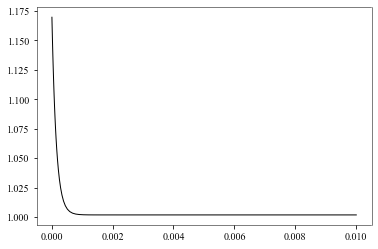

In [266]:
a1,b1,c1,d1 = float(c["fit_val"][5,0,0]), float(c["fit_val"][5,0,1]), float(c["fit_val"][5,0,2]), float(c["fit_val"][5,0,3])
print(a1,b1,c1,d1)
xl = np.logspace(-5, -2, num=50, endpoint=True, base=10.0, dtype=np.longfloat, axis=0)
# xl = list(xl)
# w = np.divide(x,b1)
j = (xl/b1)**c1
print(xl)
# p = np.power(w,c1)
y1 = (a1 * exp(-2 * j)) + d1
print(exp(-2*j))

plt.plot(xl, y1, 'k-', markersize=marker_size, linewidth = 2*line_width)


## Noisy Droplet vs Succsesfull Droplet

In [226]:
a1 = xf("E0100_D100_Pendant_022C_att01_Rq0_00001_0001-100000.hdf", cwd = fn_path)
a2 = xf("E0100_D100_Pendant_022C_att01_Rq0_00002_0001-100000.hdf", cwd = fn_path)
a3 = xf("E0100_D100_Pendant_022C_att01_Rq0_00003_0001-100000.hdf", cwd = fn_path)
a4 = xf("E0100_D100_Pendant_022C_att01_Rq0_00004_0001-100000.hdf", cwd = fn_path)
a5 = xf("E0100_D100_Pendant_022C_att01_Rq0_00005_0001-100000.hdf", cwd = fn_path)
a6 = xf("E0100_D100_Pendant_022C_att01_Rq0_00006_0001-100000.hdf", cwd = fn_path)
a7 = xf("E0100_D100_Pendant_022C_att01_Rq0_00007_0001-100000.hdf", cwd = fn_path)
a8 = xf("E0100_D100_Pendant_022C_att01_Rq0_00008_0001-100000.hdf", cwd = fn_path)
a9 = xf("E0100_D100_Pendant_022C_att01_Rq0_00009_0001-100000.hdf", cwd = fn_path)
a10 = xf("E0100_D100_Pendant_022C_att01_Rq0_00010_0001-100000.hdf", cwd = fn_path)

d1 = xf("E0098_D100_Pendant_022C_att01_Rq0_00001_0001-100000.hdf", cmd = fn_path)
d2 = xf("E0098_D100_Pendant_022C_att01_Rq0_00002_0001-100000.hdf", cwd = fn_path)
d3 = xf("E0098_D100_Pendant_022C_att01_Rq0_00019_0001-100000.hdf", cwd = fn_path)
d4 = xf("E0098_D100_Pendant_022C_att01_Rq0_00049_0001-100000.hdf", cwd = fn_path)
d5 = xf("E0098_D100_Pendant_022C_att01_Rq0_00050_0001-100000.hdf", cwd = fn_path)
d6 = xf("E0098_D100_Pendant_022C_att01_Rq0_00030_0001-100000.hdf", cwd = fn_path)
d7 = xf("E0098_D100_Pendant_022C_att01_Rq0_00016_0001-100000.hdf", cwd = fn_path)
d8 = xf("E0098_D100_Pendant_022C_att01_Rq0_00091_0001-100000.hdf", cwd = fn_path)
d9 = xf("E0098_D100_Pendant_022C_att01_Rq0_00009_0001-100000.hdf", cwd = fn_path)
d10 = xf("E0098_D100_Pendant_022C_att01_Rq0_00052_0001-100000.hdf", cwd = fn_path)


In [139]:

contrast = 0.1465
contrast_drop = 0.1465
contrast_cell = 0.121
contrast_cap = 0.121
contrast_noisy_drop = 0.172
exp_arg = 1

LB_list_g2 = [contrast, 1e-6, exp_arg, 0.95]
UB_list_g2 = [contrast, 1, exp_arg, 1.05]

k1= a1.fit_g2(q_range=[0, 0.0092],t_range=[1e-8, 1e1], bounds=[LB_list_g2,UB_list_g2],
    fit_flag=[False, True, False, True])
k2= a2.fit_g2(q_range=[0, 0.0092],t_range=[1e-8, 1e1], bounds=[LB_list_g2,UB_list_g2],
    fit_flag=[False, True, False, True])
k3= a3.fit_g2(q_range=[0, 0.0092],t_range=[1e-8, 1e1], bounds=[LB_list_g2,UB_list_g2],
    fit_flag=[False, True, False, True])
k4= a4.fit_g2(q_range=[0, 0.0092],t_range=[1e-8, 1e1], bounds=[LB_list_g2,UB_list_g2],
    fit_flag=[False, True, False, True])
k5= a5.fit_g2(q_range=[0, 0.0092],t_range=[1e-8, 1e1], bounds=[LB_list_g2,UB_list_g2],
    fit_flag=[False, True, False, True])
k6= a6.fit_g2(q_range=[0, 0.0092],t_range=[1e-8, 1e1], bounds=[LB_list_g2,UB_list_g2],
    fit_flag=[False, True, False, True])
k7= a7.fit_g2(q_range=[0, 0.0092],t_range=[1e-8, 1e1], bounds=[LB_list_g2,UB_list_g2],
    fit_flag=[False, True, False, True])
k8= a8.fit_g2(q_range=[0, 0.0092],t_range=[1e-8, 1e1], bounds=[LB_list_g2,UB_list_g2],
    fit_flag=[False, True, False, True])
k9= a9.fit_g2(q_range=[0, 0.0092],t_range=[1e-8, 1e1], bounds=[LB_list_g2,UB_list_g2],
    fit_flag=[False, True, False, True])
k10= a10.fit_g2(q_range=[0, 0.0092],t_range=[1e-8, 1e1], bounds=[LB_list_g2,UB_list_g2],
    fit_flag=[False, True, False, True])
j1= d1.fit_g2(q_range=[0, 0.0092],t_range=[1e-8, 1e1], bounds=[LB_list_g2,UB_list_g2],
    fit_flag=[False, True, False, True])
j2= d2.fit_g2(q_range=[0, 0.0092],t_range=[1e-8, 1e1], bounds=[LB_list_g2,UB_list_g2],
    fit_flag=[False, True, False, True])
j3= d3.fit_g2(q_range=[0, 0.0092],t_range=[1e-8, 1e1], bounds=[LB_list_g2,UB_list_g2],
    fit_flag=[False, True, False, True])
j4= d4.fit_g2(q_range=[0, 0.0092],t_range=[1e-8, 1e1], bounds=[LB_list_g2,UB_list_g2],
    fit_flag=[False, True, False, True])
j5= d5.fit_g2(q_range=[0, 0.0092],t_range=[1e-8, 1e1], bounds=[LB_list_g2,UB_list_g2],
    fit_flag=[False, True, False, True])
j6= d6.fit_g2(q_range=[0, 0.0092],t_range=[1e-8, 1e1], bounds=[LB_list_g2,UB_list_g2],
    fit_flag=[False, True, False, True])
j7= d7.fit_g2(q_range=[0, 0.0092],t_range=[1e-8, 1e1], bounds=[LB_list_g2,UB_list_g2],
    fit_flag=[False, True, False, True])
j8= d8.fit_g2(q_range=[0, 0.0092],t_range=[1e-8, 1e1], bounds=[LB_list_g2,UB_list_g2],
    fit_flag=[False, True, False, True])
j9= d9.fit_g2(q_range=[0, 0.0092],t_range=[1e-8, 1e1], bounds=[LB_list_g2,UB_list_g2],
    fit_flag=[False, True, False, True])
j10= d10.fit_g2(q_range=[0, 0.0092],t_range=[1e-8, 1e1], bounds=[LB_list_g2,UB_list_g2],
    fit_flag=[False, True, False, True])

g2_fit_line_droplet = a["fit_line"]
g2_fit_line_CapCell = b["fit_line"]
g2_fit_line_capillary = c["fit_line"]


# g2_fit_line stores fitted g2 at different q's into a list of dictionaries. 
# Each dictionary contains two keys, fit_x and fit_y.
# fit_x is a 2D numpy array that corresponds to the time axis at that q;
# fit_y is a 2D numpy array that corresponds to the fitted g2 values at that q;

# g2_fit_coeff is a 3D numpy array.
# i is the q ROI index;
# j=0 for fit values, j=1 for errors;
# k=0,1,2,3 to select fitting parameters
g2_fit_coeff_droplet = a["fit_val"]
g2_fit_coeff_CapCell = b["fit_val"]
g2_fit_coeff_capillary = c["fit_val"]


tauq_power = -2
LB_list_tauQ = [1e-12, tauq_power]
UB_list_tauQ = [1e-3, tauq_power]

a= droplet.fit_tauq(q_range=[0, 0.01], bounds=[LB_list_tauQ, UB_list_tauQ], fit_flag=[True, False])
tauq_fit_val_droplet = a["tauq_fit_val"]
tauq_fit_line_droplet = a["tauq_fit_line"]
tauq_q_droplet = a["tauq_q"]
tauq_tau_droplet = a["tauq_tau"]
tauq_tau_err_droplet = a["tauq_tau_err"]

b = CapCell.fit_tauq(q_range=[0, 0.01], bounds=[LB_list_tauQ, UB_list_tauQ], fit_flag=[True, False])
tauq_fit_val_CapCell = b["tauq_fit_val"]
tauq_fit_line_CapCell = b["tauq_fit_line"]
tauq_q_CapCell = b["tauq_q"]
tauq_tau_CapCell = b["tauq_tau"]
tauq_tau_err_CapCell = b["tauq_tau_err"]

c = capillary.fit_tauq(q_range=[0, 0.01], bounds=[LB_list_tauQ, UB_list_tauQ], fit_flag=[True, False])
tauq_fit_val_capillary = c["tauq_fit_val"]
tauq_fit_line_capillary = c["tauq_fit_line"]
tauq_q_capillary = c["tauq_q"]
tauq_tau_capillary = c["tauq_tau"]
tauq_tau_err_capillary = c["tauq_tau_err"]


scale = 1
width = 3.6*scale
font_size = 8*scale
line_width = 0.5*scale
marker_size = 4*scale
tick_length_major = 4*scale
tick_length_minor = 2*scale

dim=1

%matplotlib inline
fig, ax = plt.subplots(1, 1, figsize=(width, 0.8*width))
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['axes.linewidth'] = line_width


ax.errorbar(droplet.t_el, (droplet.g2[:,2]-g2_fit_coeff_droplet[2,0,3])/contrast_drop, yerr=(droplet.g2_err[:,2])/contrast_drop, fmt='rs', label = 'Pendant Drop', markersize=marker_size, linewidth=line_width, markeredgewidth=line_width, markerfacecolor='none')
ax.plot(g2_fit_line_droplet[2]["fit_x"][10:-10],(g2_fit_line_droplet[2]["fit_y"][10:-10]-g2_fit_coeff_droplet[2,0,3])/contrast_drop, 'k-',label = 'Fitting', markersize=marker_size, linewidth=2*line_width)
ax.errorbar(CapCell.t_el, (CapCell.g2[:,2]-g2_fit_coeff_CapCell[2,0,3])/contrast_cell, yerr=(CapCell.g2_err[:,2])/contrast_cell, fmt='gv',label = 'CapCell', markersize=marker_size, linewidth=line_width, markeredgewidth=line_width, markerfacecolor='none')
ax.errorbar(capillary.t_el, (capillary.g2[:,2]-g2_fit_coeff_capillary[2,0,3])/contrast_cap, yerr=(CapCell.g2_err[:,2])/contrast_cap, fmt='bo', label = 'Capillary', markersize=marker_size, linewidth=line_width, markeredgewidth=line_width, markerfacecolor='none')

ax.legend(loc= "lower left", prop={'size': 6})

ax.grid(color='k', linestyle=':', linewidth=line_width, alpha=0.1, which='both')
ax.tick_params('both', length=tick_length_major, width=line_width, which='major', labelsize=font_size)
ax.tick_params('x', length=tick_length_minor, width=0.5*line_width, which='minor',
              labelleft=False, labelbottom=False)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(line_width)

ax.set_yticks([0,0.2,0.4,0.6,0.8,1])
# ax.set_yticklabels(['0',
#                     '200000',
#                     '400000',
#                     '600000',
#                     '800000',
#                     '1000000'],
#                     fontsize = font_size)
ax.set_ylabel('$\mathdefault{\Delta}$g$\mathdefault{_2}$', 
              fontsize=font_size, labelpad=0.05*font_size)
ax.set_xticks([1e-5,1e-3,1e-1])
ax.set_xscale('log')

ax.set_ylim(-0.1, 1.1)
ax.set_xlim(1e-5, 3)
ax.set_xticklabels(['10$^\mathdefault{}$',
                    '10$^\mathdefault{1}$',
                    '10$^\mathdefault{2}$',
                    '10$^\mathdefault{3}$',
                    '10$^\mathdefault{4}$',
                    '10$^\mathdefault{5}$',
                    '10$^\mathdefault{6}$'],
                    fontsize = font_size)
ax.set_xlabel('Delay Time $\mathdefault{\u03C4}$ ($\mathdefault{\mu}$s)', 
              fontsize=font_size, labelpad=0.2*font_size)
ax.minorticks_off()


NameError: name 'a1' is not defined

## Fit tau vs. Q for CapCell and (NH$_4$)$_2$SO$_4$

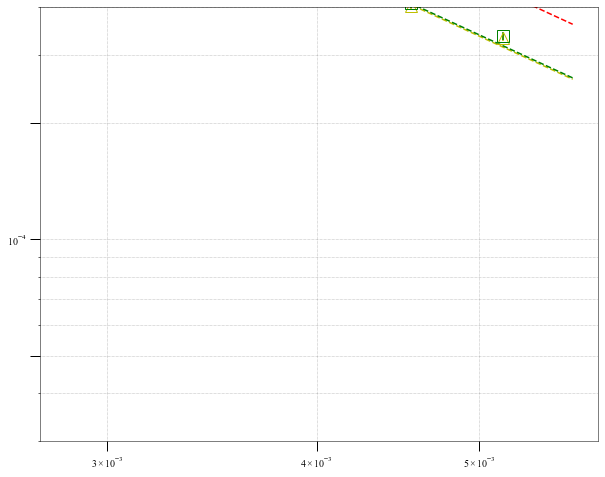

In [55]:


a= CapCell.fit_g2(q_range=[0, 0.0092],t_range=[1e-8, 1e1], bounds=[LB_list_g2, UB_list_g2],
    fit_flag=[False, True, False, True])
a= CapCell.fit_tauq(q_range=[0.003, 0.0055], bounds=[LB_list_tauQ, UB_list_tauQ], fit_flag=[True, False])
tauq_fit_val_CapCell = _["tauq_fit_val"]
tauq_fit_line_CapCell = _["tauq_fit_line"]
tauq_q_CapCell = _["tauq_q"]
tauq_tau_CapCell = _["tauq_tau"]
tauq_tau_err_CapCell = _["tauq_tau_err"]

a= capillary.fit_g2(q_range=[0, 0.0092],t_range=[1e-8, 1e1], bounds=[LB_list_g2, UB_list_g2],
    fit_flag=[False, True, False, True])
a= capillary.fit_tauq(q_range=[0.003, 0.0055], bounds=[LB_list_tauQ, UB_list_tauQ], fit_flag=[True, False])
tauq_fit_val_capillary = _["tauq_fit_val"]
tauq_fit_line_capillary = _["tauq_fit_line"]
tauq_q_capillary = _["tauq_q"]
tauq_tau_capillary = _["tauq_tau"]
tauq_tau_err_capillary = _["tauq_tau_err"]


fig, ax = plt.subplots(1, 1, figsize=(10, 8))
plt.grid(color='k', linestyle=':', linewidth=0.5, alpha=0.5, which='both')
ax.tick_params('both', length=10, width=1, which='major')
ax.tick_params('x', length=5, width=0.5, which='minor')
ax.set_xscale('log')
ax.set_yscale('log')
ax.errorbar(,tauq_tau_droplet,tauq_tau_err_droplet,fmt='ro',markersize=12, markerfacecolor='none')
ax.errorbar(tauq_q_CapCell,tauq_tau_CapCell,tauq_tau_err_CapCell,fmt='y^',markersize=12, markerfacecolor='none')
ax.errorbar(tauq_q_capillary,tauq_tau_capillary,tauq_tau_err_capillary,fmt='gs',markersize=12, markerfacecolor='none')
ax.plot(tauq_fit_line_droplet["fit_x"],tauq_fit_line_droplet["fit_y"],'r--')
ax.plot(tauq_fit_line_CapCell["fit_x"],tauq_fit_line_CapCell["fit_y"],'y--')
ax.plot(tauq_fit_line_capillary["fit_x"],tauq_fit_line_capillary["fit_y"],'g--')
ax.set_xticks([3e-3, 4e-3, 5e-3])
ax.set_yticks([5e-5, 1e-4, 2e-4])
ax.set_ylim(3e-5, 4e-4)
plt.savefig('TauQ_all_sample.pdf')



## Calculate hydrodynamic radius
Boltzmann constant = $1.38\times10^{-23}$ m$^2\cdot$ kg $\cdot$ s$^{-2}\cdot$ K$^{-1}$   
T = 273.15 + 6 = 279.15 K   
$\eta$ = 1.472 $\times 10^{-3}$ Pa$\cdot$s

$D = kT\ /\ 6\pi \eta R$

In [56]:

k = 1.38e-23
T = 273.5 + 6
eta = 1.472e-3

diff_droplet = 1/tauq_fit_val_droplet[0,0]*1e-20
diff_CapCell = 1/tauq_fit_val_CapCell[0,0]*1e-20
diff_capillary = 1/tauq_fit_val_capillary[0,0]*1e-20

Rh_droplet = k*T/(6*3.14159*eta*diff_droplet)
Rh_CapCell = k*T/(6*3.14159*eta*diff_CapCell)
Rh_capillary = k*T/(6*3.14159*eta*diff_capillary)

Rh_err_ratio_droplet = tauq_fit_val_droplet[1,0]/tauq_fit_val_droplet[0,0]
Rh_err_ratio_CapCell = tauq_fit_val_CapCell[1,0]/tauq_fit_val_CapCell[0,0]
Rh_err_ratio_capillary = tauq_fit_val_capillary[1,0]/tauq_fit_val_capillary[0,0]

print(f'RH droplet is {Rh_droplet*1e9:4.2f} \u00B1 {Rh_droplet*Rh_err_ratio_droplet*1e9:4.2f} nm') 
print(f'RH CapCell is {Rh_CapCell*1e9:4.2f} \u00B1 {Rh_CapCell*Rh_err_ratio_CapCell*1e9:4.2f} nm')
print(f'RH capillary is {Rh_capillary*1e9:4.2f} \u00B1 {Rh_capillary*Rh_err_ratio_capillary*1e9:4.2f} nm')
      

RH droplet is 161.57 ± 2.66 nm
RH CapCell is 116.46 ± 2.15 nm
RH capillary is 117.39 ± 2.23 nm
